___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
# cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import numpy as np
import pandas as pd

# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding='latin-1')
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin-1')

## Explore Data

In [3]:
df_male.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [4]:
df_female.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [5]:
df_male.shape , df_female.shape

((4082, 108), (1986, 108))

In [6]:
df_male.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [7]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [8]:
df_male.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,4082.0,254.650906,37.327178,163.0,227.00,251.0,279.00,451.0
acromialheight,4082.0,1440.736894,63.287242,1194.0,1398.00,1439.0,1481.00,1683.0
acromionradialelength,4082.0,335.244488,17.482795,270.0,324.00,335.0,346.00,393.0
anklecircumference,4082.0,229.343949,14.649102,156.0,219.25,228.0,239.00,293.0
axillaheight,4082.0,1329.082068,59.516123,1106.0,1289.00,1328.0,1367.00,1553.0
balloffootcircumference,4082.0,252.017148,12.936131,186.0,243.00,252.0,261.00,306.0
balloffootlength,4082.0,200.935081,10.470947,156.0,194.00,201.0,208.00,245.0
biacromialbreadth,4082.0,415.675649,19.161654,337.0,403.00,415.0,428.00,489.0
bicepscircumferenceflexed,4082.0,358.135718,34.618093,246.0,335.00,357.0,380.00,490.0


In [9]:
df_female.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,1986.0,229.651057,31.464691,155.0,207.00,227.0,249.00,358.0
acromialheight,1986.0,1335.095166,58.079885,1115.0,1298.00,1332.0,1374.00,1536.0
acromionradialelength,1986.0,311.198389,17.164691,249.0,300.00,311.0,323.00,371.0
anklecircumference,1986.0,215.739678,14.891757,170.0,205.00,215.0,225.00,275.0
axillaheight,1986.0,1239.029708,55.801958,1038.0,1202.00,1236.0,1277.00,1419.0
balloffootcircumference,1986.0,228.110272,11.771007,194.0,220.00,227.0,236.00,270.0
balloffootlength,1986.0,182.051360,9.641920,151.0,175.00,182.0,188.00,216.0
biacromialbreadth,1986.0,365.348943,18.298851,283.0,353.00,365.0,378.00,422.0
bicepscircumferenceflexed,1986.0,305.578550,30.757033,216.0,285.00,304.0,324.00,435.0


In [10]:
df = pd.concat([df_female,df_male])

In [11]:
df.shape

(6068, 109)

In [12]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [14]:
df.isnull().sum()

SubjectId                         4082
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [15]:
df.SubjectId.value_counts(dropna=False)

NaN        4082
18134.0       1
25392.0       1
28961.0       1
27212.0       1
           ... 
27840.0       1
25686.0       1
28747.0       1
23956.0       1
13297.0       1
Name: SubjectId, Length: 1987, dtype: int64

In [16]:
df.subjectid.value_counts(dropna=False)

NaN        1986
10638.0       1
14659.0       1
27710.0       1
27051.0       1
           ... 
28348.0       1
15181.0       1
28385.0       1
27874.0       1
16405.0       1
Name: subjectid, Length: 4083, dtype: int64

In [17]:
Null_list = []
for column in df.columns:
    if df[column].isnull().sum()>0:
        print("{name} = {quantity}".format(name = column, quantity = df[column].isnull().sum()))
        Null_list.append(column)

SubjectId = 4082
Ethnicity = 4647
subjectid = 1986


In [18]:
Null_list

['SubjectId', 'Ethnicity', 'subjectid']

In [19]:
df = df.drop(Null_list, axis = 1)

In [20]:
df.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [21]:
df.isna()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(6068, 106)

Now, the second thing that caught my eye in the Dataset is; "SubjectNumericRace" and "DODRace" column  

SubjectNumericRace: 
a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

DODRace: 
Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [24]:
df[['DODRace','SubjectNumericRace']]

,DODRace,SubjectNumericRace
0,2,2
1,3,3
2,1,1
3,2,8
4,1,1
...,...,...
4077,1,51
4078,1,1
4079,1,1
4080,1,1


In [25]:
#decision to drop SubjectNumericRace
df.drop('SubjectNumericRace', axis = 1, inplace =True)

In [26]:
df.shape

(6068, 105)

In [27]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [28]:
df = df[df['DODRace'].isin([1,2,3])]

In [29]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [30]:
df.shape

(5769, 105)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64


<AxesSubplot:ylabel='DODRace'>

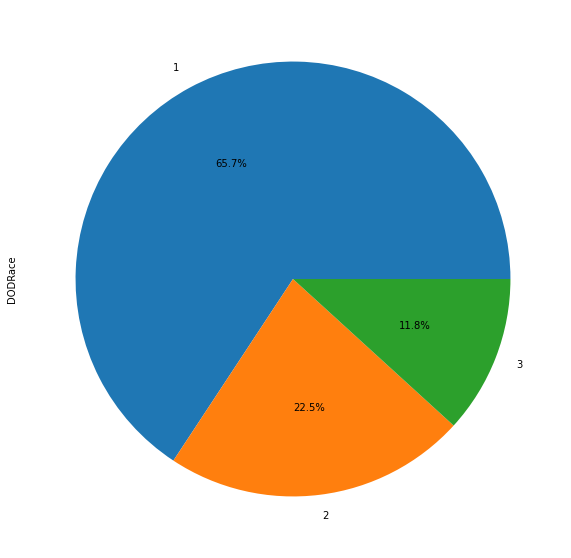

In [31]:
print(df['DODRace'].value_counts());
df['DODRace'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize = (10,10))

In [32]:
df.DODRace.unique()

array([2, 3, 1])

In [33]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic", 4 : "Asian", 5 : "Native American", 6 : "Pacific Islander", 8 : "Other"})

In [34]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [35]:
# data = data[data["DODRace"].isin([1,2,3])]
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,Black,26,61,142,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Hispanic,21,64,120,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,White,23,68,147,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Black,22,66,175,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810

In [36]:
df.reset_index(drop=True, inplace = True)

In [37]:
#Unnecessary columns, because they are repetitive or irrelevant.
drops = ['Date', 'Installation', 'Component', 'PrimaryMOS', 'Weightlbs', 'Heightin']

In [38]:
df.drop(drops, axis= 1, inplace=True)

In [39]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [40]:
df.shape

(5769, 99)

<AxesSubplot:>

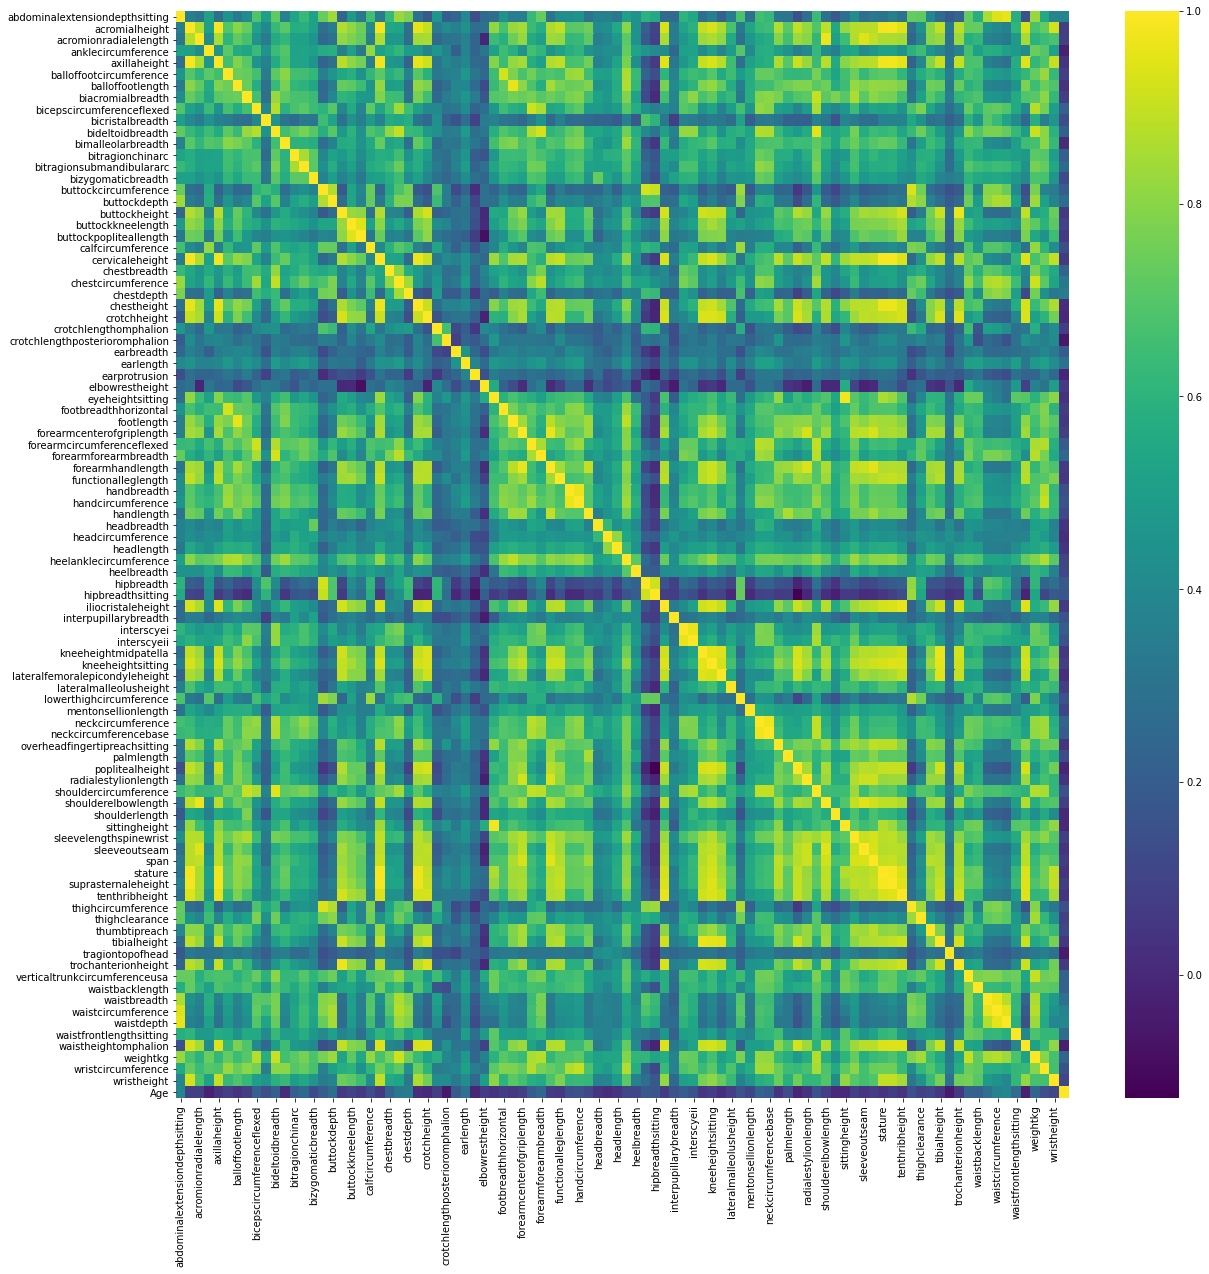

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="viridis")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [42]:
X = df.drop('DODRace', axis= 1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace


In [43]:
rand_state = 42 #to avoid distraction | confusion
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = rand_state, stratify = y)

<IPython.core.display.Javascript object>

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4615, 234), (4615,), (1154, 234), (1154,))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [45]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [46]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=rand_state))]
pipe_log_model = Pipeline(steps=operations)

In [47]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  13   8]
 [ 14 102  20]
 [ 10  98 650]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.75      0.58       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 972   35   31]
 [  16  457   70]
 [  70  365 2599]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [48]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [49]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=rand_state))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.605397
test_precision_Hispanic    0.496528
test_recall_Hispanic       0.778687
dtype: float64

### Logistic Model GridsearchCV

In [50]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [51]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [52]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=rand_state))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, 
                              cv=5)

In [53]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [54]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [55]:
log_model_grid.best_score_

0.7809378185524973

In [56]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  13   8]
 [ 14 102  20]
 [ 10  98 650]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.75      0.58       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 972   35   31]
 [  16  457   70]
 [  70  365 2599]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



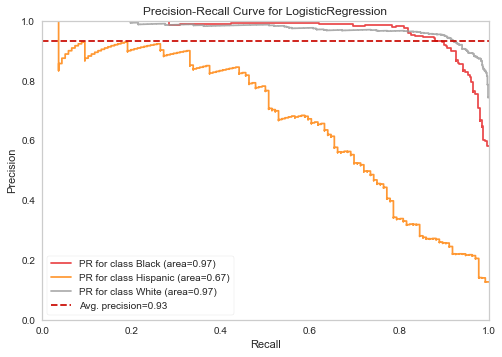

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=rand_state))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [58]:
viz.score_#["Hispanic"]

{'Black': 0.9695845510559028,
 'Hispanic': 0.6673474814753738,
 'White': 0.9736001537966634,
 'micro': 0.9317863040459414}

In [59]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

Lojistic Regression solver "liblenear" for small dataset

In [60]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     max_iter=10000,
                                                                     random_state=rand_state,
                                                                     solver="liblinear", 
                                                                     penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [61]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[240   6  14]
 [ 13  87  36]
 [  8  42 708]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.64      0.64      0.64       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 975   19   44]
 [  21  382  140]
 [  53  145 2836]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.70      0.70       543
       White       0.94      0.93      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [62]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.663976
test_precision_Hispanic    0.674987
test_recall_Hispanic       0.655488
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [63]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=rand_state))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [64]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  15  10]
 [ 12 101  23]
 [ 11 110 637]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.45      0.74      0.56       136
       White       0.95      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.84      0.86      1154


Train_Set
[[ 956   35   47]
 [  22  457   64]
 [  52  393 2589]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.52      0.84      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [65]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.590800
test_precision_Hispanic    0.479898
test_recall_Hispanic       0.769596
dtype: float64

###  SVC Model GridsearchCV

In [66]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [67]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=rand_state))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [68]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [69]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [70]:
svm_model_grid.best_score_

0.7661909616038056

In [71]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  12  11]
 [ 11  99  26]
 [ 14 108 636]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       260
    Hispanic       0.45      0.73      0.56       136
       White       0.95      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 973   30   35]
 [  17  470   56]
 [  47  361 2626]]
              precision    recall  f1-score   support

       Black       0.94      0.94      0.94      1038
    Hispanic       0.55      0.87      0.67       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



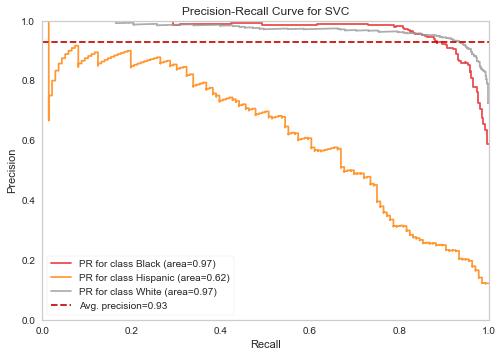

In [72]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=rand_state))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [73]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [74]:
from sklearn.preprocessing import OrdinalEncoder

In [75]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [76]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [77]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.0,2.0,41.0,26,2.0
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.0,1.0,18.0,21,2.0
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.0,1.0,119.0,23,2.0
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,0.0,1.0,30.0,22,2.0
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,0.0,0.0,119.0,45,2.0


In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=rand_state, stratify =y)

<IPython.core.display.Javascript object>

### Vanilla RF Model

In [79]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=rand_state)

In [80]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [81]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[185   0  75]
 [  8   6 122]
 [  8   3 747]]
              precision    recall  f1-score   support

       Black       0.92      0.71      0.80       260
    Hispanic       0.67      0.04      0.08       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.79      0.58      0.59      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [82]:
model = RandomForestClassifier(class_weight="balanced", random_state=rand_state)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.058547
test_precision_Hispanic    0.762500
test_recall_Hispanic       0.031212
dtype: float64

### RF Model GridsearchCV

In [83]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]

In [84]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=rand_state)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [85]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [86]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [87]:
rf_grid_model.best_score_

0.2375806999660211

In [88]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[204   5  51]
 [ 10  39  87]
 [ 21  37 700]]
              precision    recall  f1-score   support

       Black       0.87      0.78      0.82       260
    Hispanic       0.48      0.29      0.36       136
       White       0.84      0.92      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.66      0.69      1154
weighted avg       0.80      0.82      0.80      1154


Train_Set
[[1021    1   16]
 [   0  531   12]
 [   2   27 3005]]
              precision    recall  f1-score   support

       Black       1.00      0.98      0.99      1038
    Hispanic       0.95      0.98      0.96       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.98      0.98      4615
weighted avg       0.99      0.99      0.99      4615



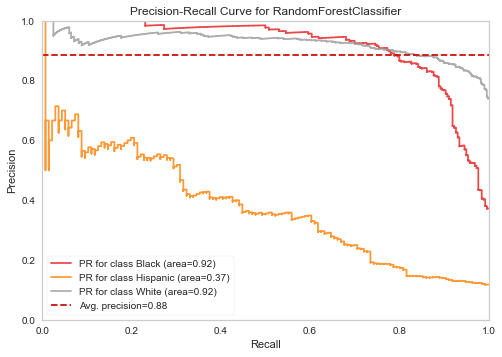

In [89]:
model = RandomForestClassifier(class_weight="balanced", random_state=rand_state, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [90]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [91]:
xgb_model = XGBClassifier(random_state=rand_state)

### XGBoost Model GridsearchCV

In [92]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [93]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[02:00:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[232   3  25]
 [ 11  63  62]
 [ 14  30 714]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       260
    Hispanic       0.66      0.46      0.54       136
       White       0.89      0.94      0.92       758

    accuracy                           0.87      1154
   macro avg       0.82      0.77      0.79      1154
weighted avg       0.87      0.87      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [95]:
model = XGBClassifier(random_state=rand_state)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[02:00:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:00:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

test_f1_Hispanic           0.549507
test_precision_Hispanic    0.696999
test_recall_Hispanic       0.456498
dtype: float64

In [96]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [97]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [98]:
xgb_model = XGBClassifier(random_state=rand_state)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[02:13:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [100]:
xgb_grid_model.best_score_

0.6335711858647638

In [101]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[230  15  15]
 [ 12  89  35]
 [ 35 107 616]]
              precision    recall  f1-score   support

       Black       0.83      0.88      0.86       260
    Hispanic       0.42      0.65      0.51       136
       White       0.92      0.81      0.87       758

    accuracy                           0.81      1154
   macro avg       0.73      0.78      0.74      1154
weighted avg       0.84      0.81      0.82      1154


Train_Set
[[ 972   28   38]
 [  16  465   62]
 [  91  340 2603]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.56      0.86      0.68       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



[02:13:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:13:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:13:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


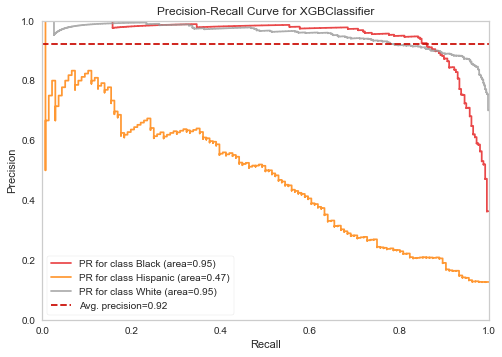

In [102]:
model = XGBClassifier(random_state=rand_state, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [103]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

# Comparing Models

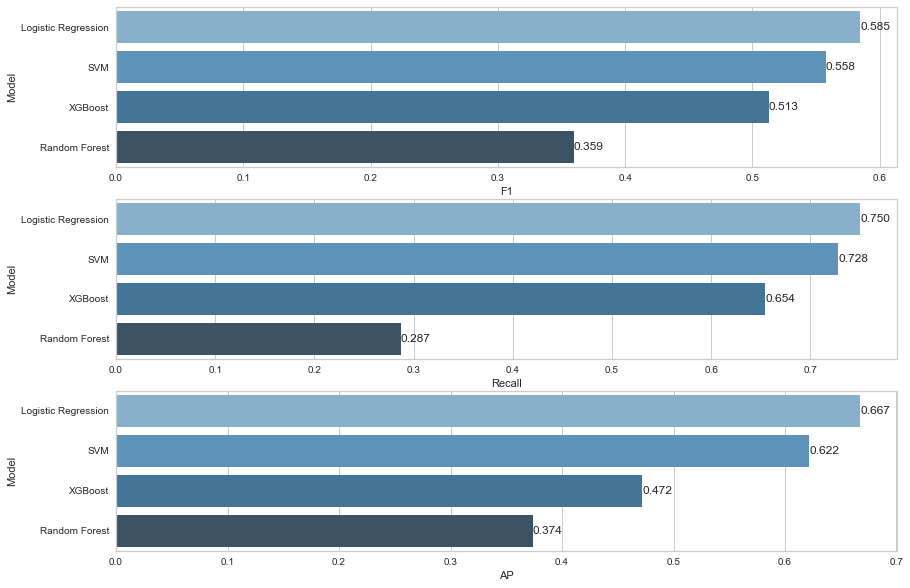

In [104]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [105]:
#!pip install imblearn

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

In [109]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [110]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [111]:
y_resampled_over.value_counts()

White       3034
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [112]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [113]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [114]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [115]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [116]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## SVC Over/Under Sampling

In [117]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

In [118]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels = ["Hispanic"])
f1_score_weighed = make_scorer(f1_score, average="weighted")

In [119]:
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=f1_score_weighed, refit=True,n_jobs=-1)

In [120]:
svm_model_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 50., 100., 150., 200.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto', 1, 2], 'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [121]:
svm_model_grid.best_params_

{'C': 200.0,
 'class_weight': 'balanced',
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

[[238  17   5]
 [ 15  93  28]
 [ 14 165 579]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.34      0.68      0.45       136
       White       0.95      0.76      0.85       758

    accuracy                           0.79      1154
   macro avg       0.73      0.79      0.73      1154
weighted avg       0.86      0.79      0.81      1154



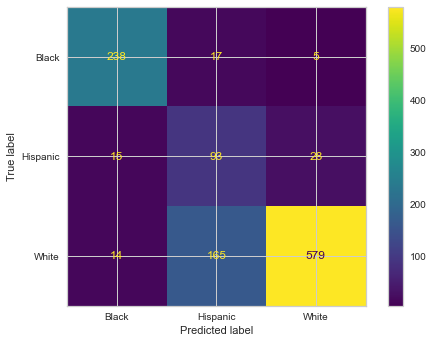

In [122]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

## Xgboost Over/ Under Sampling

In [123]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[6,8],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5],
              "colsample_bytree":[0.5, 1]}

In [124]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[02:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [125]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 0.5}

[[229   8  23]
 [ 10  59  67]
 [ 10  35 713]]
              precision    recall  f1-score   support

       Black       0.92      0.88      0.90       260
    Hispanic       0.58      0.43      0.50       136
       White       0.89      0.94      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154



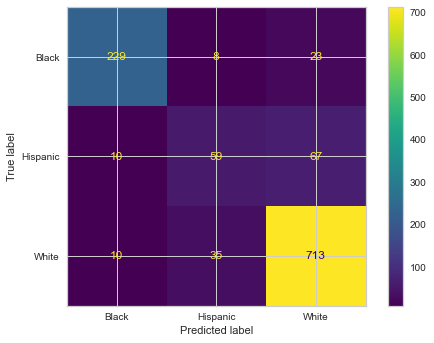

In [126]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [127]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.728588496889846

In [128]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7260183417904194

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [129]:
!pip install shap

In [130]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [132]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[240  10  10]
 [ 16 101  19]
 [ 14  99 645]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.48      0.74      0.58       136
       White       0.96      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 972   34   32]
 [  17  457   69]
 [  73  346 2615]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [136]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [138]:
shap_values

[array([[ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -2.16612963e-01, -0.00000000e+00, -5.26415537e-02,
          0.00000000e+00,  0.00000000e+00,  7.24956292e-01,
          2.40520853e-01,  0.00000000e+00, -7.36396362e-04,
          5.21853734e-01, -1.62530827e-01, -2.69307080e-01,
          0.00000000e+00,  2.99059862e-01,  4.22751249e-02,
          3.75364757e-01,  1.18021573e-02,  0.00000000e+00,
          0.00000000e+00, -5.15735980e-02, -3.86829702e-01,
         -2.99660069e-01, -0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -9.52262783e-03,  0.00000000e+00,
          1.67988870e-01,  2.63090911e-02,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.45583507e-01,  0.00000000e+00,
          4.83539263e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -8.17765607e-02, -7.25554453e-01,
          3.99120572e-01,  0.00000000e+00,  2.83368609e-01,
          3.48018513e-01,  1.99845804e-0

In [139]:
print(shap_values[0].shape)

(1, 234)


In [141]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

The log_model predicted: Black


In [143]:
explainer.expected_value[1]

2.714991015045941

In [144]:
X_test_scaled[200]

array([0.30067568, 0.62383613, 0.70833333, 0.54471545, 0.59674134,
       0.61607143, 0.71084337, 0.72139303, 0.52307692, 0.64596273,
       0.56428571, 0.79411765, 0.61864407, 0.50694444, 0.4375    ,
       0.49444444, 0.47159091, 0.56132075, 0.57587549, 0.59375   ,
       0.52608696, 0.64339623, 0.68      , 0.55720054, 0.44827586,
       0.65612648, 0.60570071, 0.50778816, 0.48868778, 0.66666667,
       0.4       , 0.47619048, 0.61835749, 0.6614786 , 0.69565217,
       0.73786408, 0.70700637, 0.57065217, 0.54060914, 0.69565217,
       0.5966736 , 0.72222222, 0.62352941, 0.54878049, 0.63043478,
       0.69924812, 0.75471698, 0.62121212, 0.9       , 0.44878049,
       0.464     , 0.6201373 , 0.60784314, 0.58561644, 0.57195572,
       0.54887218, 0.56756757, 0.58677686, 0.4893617 , 0.38327526,
       0.6       , 0.48497854, 0.43111111, 0.74814815, 0.70212766,
       0.61818182, 0.72727273, 0.6114082 , 0.72368421, 0.69230769,
       0.69314079, 0.80555556, 0.72909699, 0.72081218, 0.64972

In [145]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

In [146]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

# Shap values for all data

In [147]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

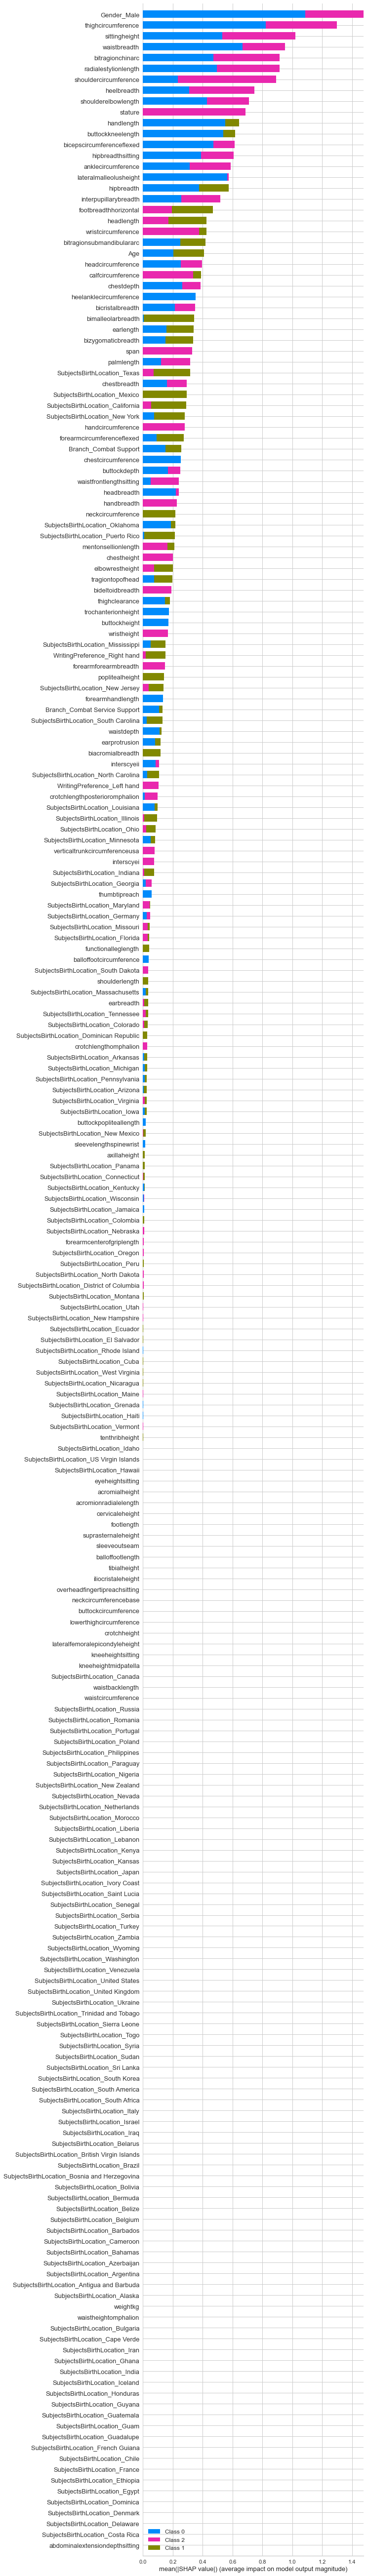

In [148]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

In [149]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [150]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [151]:
X3.shape

(5769, 154)

In [152]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=rand_state, stratify =y)

<IPython.core.display.Javascript object>

In [153]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=rand_state,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [154]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [155]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[216  12  32]
 [ 10  94  32]
 [ 97 124 537]]
              precision    recall  f1-score   support

       Black       0.67      0.83      0.74       260
    Hispanic       0.41      0.69      0.51       136
       White       0.89      0.71      0.79       758

    accuracy                           0.73      1154
   macro avg       0.66      0.74      0.68      1154
weighted avg       0.79      0.73      0.75      1154


Train_Set
[[ 874   50  114]
 [  33  441   69]
 [ 375  492 2167]]
              precision    recall  f1-score   support

       Black       0.68      0.84      0.75      1038
    Hispanic       0.45      0.81      0.58       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



In [156]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.554826
test_precision_Hispanic    0.434615
test_recall_Hispanic       0.769596
dtype: float64

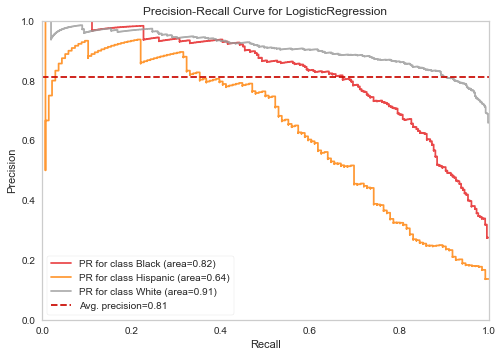

In [157]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();


# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [158]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=rand_state))]
final_model = Pipeline(steps=operations)

In [159]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [160]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirt

In [161]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.254290
acromialheight                                  1408.630265
acromionradialelength                            328.071590
anklecircumference                               225.201768
axillaheight                                    1301.902583
balloffootcircumference                          244.408043
balloffootlength                                 195.118911
biacromialbreadth                                399.706015
bicepscircumferenceflexed                        341.663027
bicristalbreadth                                 274.903449
bideltoidbreadth                                 491.454845
bimalleolarbreadth                                72.335413
bitragionchinarc                                 324.962212
bitragionsubmandibulararc                        306.677760
bizygomaticbreadth                               139.529381
buttockcircumference                            1022.059456
buttockdepth                            

In [162]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [163]:
y[201]

'Hispanic'

In [164]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [165]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7773921727933629

In [166]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7685397796749902

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___